In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import pickle
import numpy as np

In [2]:
data = pd.read_csv('energy.csv')
l = []
for i in range(0,len(data)):
    if data['W'].values[i] == '\\N' or data['VAR'].values[i] == '\\N':
        l.append(i)
print(l)
data = data.drop(l)
data.head()

[102920, 192914, 331538, 345698, 434944]


,timestamp,W,VAR
0,1369353600,0,6.00003E-18
1,1369353601,0,6.00003E-18
2,1369353602,0,6.00003E-18
3,1369353603,0,6.00003E-18
4,1369353604,0,6.00003E-18


In [3]:
print(len(data))

499994


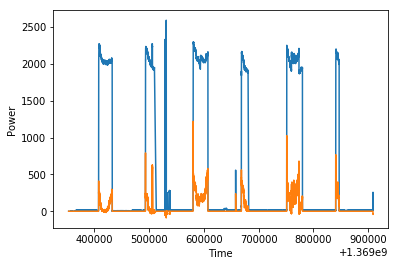

In [4]:
plt.plot(data['timestamp'],data['W'].values.astype(float))
plt.plot(data['timestamp'],data['VAR'].values.astype(float))
plt.xlabel('Time')
plt.ylabel('Power')
plt.show()

In [5]:
df = pd.DataFrame(columns=['DW', 'DVAR','Cluster No'])
df['DW'] = data['W'].values[:-1].astype(float) - data['W'].values[1:].astype(float)
df['DVAR'] = data['VAR'].values[:-1].astype(float) - data['VAR'].values[1:].astype(float)

In [6]:
dW = df['DW']
remove = []
for i in range(len(dW)):
    if dW[i]<20:
        remove.append(i)
df = df.drop(remove)
df.head()

,DW,DVAR,Cluster No
46825,126.437012,73.473999,NaN
46826,75.580994,16.292999,NaN
47011,30.070068,6.471008,NaN
47013,27.630005,-17.173004,NaN
49899,22.850098,18.209801,NaN


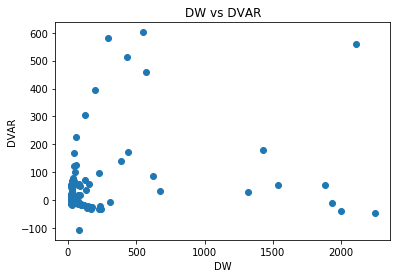

In [7]:
plt.scatter(df['DW'].values,df['DVAR'].values)
plt.xlabel('DW')
plt.ylabel('DVAR')
plt.title('DW vs DVAR')
plt.show()

In [8]:
dW = df['DW'].values
dVar = df['DVAR'].values
X = []
for i in range(len(dW)):
    X.append([dW[i],dVar[i]])
print(X[:8])

[[126.43701172000004, 73.47399902999999], [75.58099364999998, 16.292999259999988], [30.070068300000003, 6.471008299999994], [27.63000480000005, -17.173004149999997], [22.85009769999988, 18.20980071999999], [21.25, 3.699798584000007], [22.910034199999927, 9.6720199585], [23.419921899999963, 0.0]]


In [9]:
distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    distances.append(km.inertia_)
    print("k = {} centroids are = {}".format(k,km.cluster_centers_))

k = 2 centroids are = [[  80.68107158   37.70752146]
 [1806.98492264   97.10903883]]
k = 3 centroids are = [[  52.74055449   16.27764791]
 [1806.98492264   97.10903883]
 [ 462.53480512  330.58245998]]
k = 4 centroids are = [[  52.74055449   16.27764791]
 [2034.49410439  103.10554352]
 [ 462.53480512  330.58245998]
 [1427.80295307   87.11486435]]
k = 5 centroids are = [[  42.8312024    17.33021629]
 [2034.49410439  103.10554352]
 [ 408.25200198  509.29337673]
 [1427.80295307   87.11486435]
 [ 359.73907578   40.32906427]]
k = 6 centroids are = [[  33.26169958   15.92168674]
 [2034.49410439  103.10554352]
 [ 530.38830903  107.19381404]
 [ 183.00539673   18.65813821]
 [1427.80295307   87.11486435]
 [ 408.25200198  509.29337673]]
k = 7 centroids are = [[  33.26169958   15.92168674]
 [2016.81883859  -10.78457451]
 [ 530.38830903  107.19381404]
 [1427.80295307   87.11486435]
 [ 408.25200198  509.29337673]
 [2105.19516758  558.66601562]
 [ 183.00539673   18.65813821]]
k = 8 centroids are = [[ 

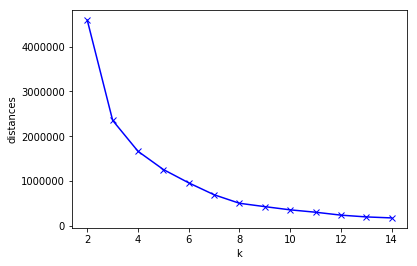

In [10]:
plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('distances')
plt.show()

In [11]:
for i in range(2,15):
    print("{} => {}".format(i,distances[i-2]))

2 => 4589819.432099244
3 => 2353018.2282810174
4 => 1662399.7503450632
5 => 1255720.7475446756
6 => 957746.686508481
7 => 692079.206408876
8 => 501847.53402708157
9 => 426911.4610054521
10 => 355168.4700271222
11 => 302015.43787642755
12 => 236792.53509383142
13 => 197330.89496225788
14 => 174895.05459881635


In [12]:
k = 4
km = KMeans(n_clusters=k)
km = km.fit(X)

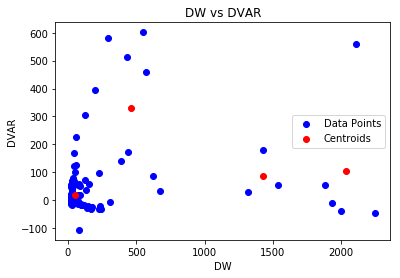

In [13]:
plt.scatter(df['DW'].values,df['DVAR'].values,color='blue',label='Data Points')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',label='Centroids')
plt.xlabel('DW')
plt.ylabel('DVAR')
plt.legend()
plt.title('DW vs DVAR')
plt.show()

In [14]:
df['Cluster No'] = km.labels_

In [15]:
df.head()

,DW,DVAR,Cluster No
46825,126.437012,73.473999,0
46826,75.580994,16.292999,0
47011,30.070068,6.471008,0
47013,27.630005,-17.173004,0
49899,22.850098,18.209801,0


In [16]:
df.to_csv('./output.csv',columns=['DW','DVAR','Cluster No'],index=False)
pickle.dump(km, open("save.pkl", "wb"))

In [17]:
kmeans = pickle.load(open("save.pkl", "rb"))
kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 0,
       0, 0, 2, 3, 0, 0, 0, 0])